integral= 0.29371525706963225 λ


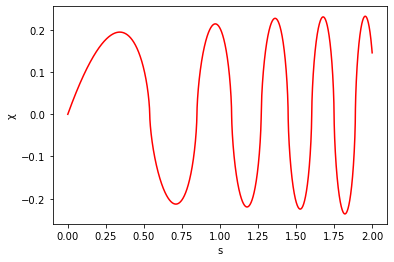

In [2]:
# Repoducing the result of eq.(14) in research paper "The merger rate of primordial-black-hole 
# binariees".

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt


def f(u,s):
    return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(((u[0]**2+b**2)**(3/2))))]
b=1e-6
separation0= [1e-12,1]
ss= np.linspace(1e-12,2,1000000)  # not right as the final value of scale factor, s does not corresponds to the 
                                   # radiation domintaion era.
us= odeint(f,separation0,ss)
separations= us[:,0]

S_list=ss.tolist()
χ=np.square(separations)
s_telda=np.square(ss)
integrand=np.divide(χ,s_telda)
Y=np.trapz(integrand,S_list)
print("integral=",Y,"λ") 





plt.plot(ss,separations,'r')
plt.xlabel('s')
plt.ylabel('χ')
plt.show()

Y_1= 1.4732e+08
Z_1= 2.8030e+03
Y_1= 2.9463e+08
Z_1= 1.1211e+04
Y_1= 4.4194e+08
Z_1= 2.5225e+04
Y_1= 5.8924e+08
Z_1= 4.4841e+04
Y_1= 7.3654e+08
Z_1= 7.0060e+04
Y_1= 8.8385e+08
Z_1= 1.0089e+05
Y_1= 1.0311e+09
Z_1= 1.3731e+05
Y_1= 1.1784e+09
Z_1= 1.7933e+05
Y_1= 1.3257e+09
Z_1= 2.2697e+05
Y_1= 1.4730e+09
Z_1= 2.8019e+05
Y_1= 2.9456e+09
Z_1= 1.1203e+06
Y_1= 4.4178e+09
Z_1= 2.5196e+06
Y_1= 5.8896e+09
Z_1= 4.4778e+06
Y_1= 7.3609e+09
Z_1= 6.9934e+06
Y_1= 8.8319e+09
Z_1= 1.0066e+07
Y_1= 1.0303e+10
Z_1= 1.3696e+07
Y_1= 1.1773e+10
Z_1= 1.7882e+07
Y_1= 1.3243e+10
Z_1= 2.2623e+07
Y_1= 1.4712e+10
Z_1= 2.7918e+07
Y_1= 2.9383e+10
Z_1= 1.1120e+08
Y_1= 4.4010e+10
Z_1= 2.4897e+08
Y_1= 5.8583e+10
Z_1= 4.3976e+08
Y_1= 7.3101e+10
Z_1= 6.8226e+08
Y_1= 8.7587e+10
Z_1= 9.7698e+08
Y_1= 1.0205e+11
Z_1= 1.3241e+09
Y_1= 1.1648e+11
Z_1= 1.7228e+09
Y_1= 1.3087e+11
Z_1= 2.1721e+09


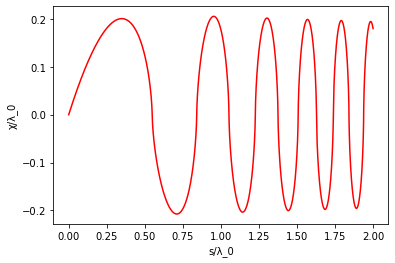

In [3]:
#Solution of eq.(49) in pdf "Tidal forces on the PBH binary". 



π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity


def M_r_halo(s):    #Mass of the DM halo ee.(32) in pdf "Tidal forces on the PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)

def s_dec(λ_0,s):
    return (λ_0*s)


def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) 
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)

λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]

for λ_0 in λ_list:
    def f(u,s):                                # radiation-domination case
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]   #eq.(29) in 
                                               #reference pdf pdf "Tidal forces on the PBH binary".
    separation0= [1e-12,1]
    b= ((λ_0)/1000)
    ss= np.linspace(1e-12,(6*λ_0)/3,1000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    s_list=ss.tolist()
    χ=np.square(separations)
    s_telda=np.square(ss)
    integrand_1=np.divide(χ,s_telda)
    integrand_2=np.divide(χ,s_list) 
    
    
    Y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(49) in pdf "Tidal forces on the PBH binary".
    Y_1=Y*4.8730e12
    print("Y_1=",'%0.4e'%Y_1)
    
    Z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(49) in pdf "Tidal forces on the PBH binary".
    Z_1=3.3651e12*Z
    print("Z_1=",'%0.4e'%Z_1)


plt.plot(As,Bs,'r')
plt.xlabel('s/λ_0')
plt.ylabel('χ/λ_0')
plt.show()